# **Prepare Data**

In [1]:
pip install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 11.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('/kaggle/input/helpdesk-tik-raw/Rekap Dataset-v0.2 - dataset (1).csv', na_values=np.nan)
data = data.sort_values('intensi').reset_index()
data.head()

,index,no,intensi,chat,thread_id,entitas,kebakuan,jenis_ketidakbakuan,kata_tidak_baku,perbaikan,Note,format_nlu
0,250,251,buat_reset_webhosting,"<p>Assalamualaiku, selamat siang, saya Naufal ...",14302,orang:Naufal Harda|organisasi:Departemen Tekni...,NaN,NaN,NaN,NaN,NaN,"assalamualaiku, selamat siang, saya [naufal ha..."
1,283,284,buat_reset_webhosting,<p>bagaimana alur pengajuan web hosting untuk ...,15857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,287,288,buat_reset_webhosting,"<p>Yth. STI UB,</p> <p>Berikut kami lampirkan ...",16345,organisasi:Fakultas teknik,NaN,NaN,NaN,NaN,NaN,NaN
3,288,289,buat_reset_webhosting,"<p>Selamat Sore, mohon maaf mengganggu waktuny...",16397,orang:Annisa Mega|organisasi:AMSA Brawijaya,NaN,NaN,NaN,NaN,NaN,NaN
4,290,291,buat_reset_webhosting,<p>Yth. Kepala UPT Sistem dan Teknologi Inform...,16704,organisasi:Fakultas Hukum Universitas Brawijaya,NaN,NaN,NaN,NaN,NaN,yth. kepala upt sistem dan teknologi informasi...


In [4]:
data.groupby('intensi')['intensi'].count()

intensi
buat_reset_webhosting        68
gagal_login                  78
masalah_vpn                  70
mengajukan_email             67
nilai_it_tidak_keluar        75
permintaan_lisensi_office    82
ucapan_terima_kasih          61
Name: intensi, dtype: int64

In [7]:
df = data[['intensi','chat']]
le = LabelEncoder()
df['intensi'] = le.fit_transform(df['intensi'])
df.head()

/tmp/ipykernel_34/762207598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intensi'] = le.fit_transform(df['intensi'])


,intensi,chat
0,0,"<p>Assalamualaiku, selamat siang, saya Naufal ..."
1,0,<p>bagaimana alur pengajuan web hosting untuk ...
2,0,"<p>Yth. STI UB,</p> <p>Berikut kami lampirkan ..."
3,0,"<p>Selamat Sore, mohon maaf mengganggu waktuny..."
4,0,<p>Yth. Kepala UPT Sistem dan Teknologi Inform...


In [8]:
import string
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

def clean_data(df):
  text = df['chat']
  text = re.sub(r'<[^>]*>', ' ', text) 
  text = re.sub(r'[^\x00-\x7F]+', ' ', text)
  words = text.split()
  for i in range(len(words)):
      words[i] = re.sub(r'[^\w]', ' ', words[i])
  text = ' '.join(words)
  text = ' '.join(text.split())
    
  stop_fact = StopWordRemoverFactory().get_stop_words()
  more_more_stopword = []
  more_stopword = ['bapak', 'pak', 'ibu', 'bu', 'selamat', 'pagi', 'siang', 'sore', 
                   'Bapak', 'Pak', 'Ibu', 'Bu', 'Selamat', 'Pagi', 'Siang', 'Sore',
                   'assalamualaikum', 'assalamu', 'alaikum', 'wr', 'wb', 'ub', 'kepala', 'upt', 'universitas', 'brawijaya',
                   'mohon', 'maaf', 'yth', 'tik', 'sti', 'bantuannya', 'ac', 'id', 'co', 'com' 
                   'Assalamualaikum', 'Assalamu', 'Wr', 'Wb', 'UB', 'Ub', 'Kepala', 'UPT', 'Universitas', 'Brawijaya',
                   'Mohon', 'Maaf', 'Yth', 'TIK', 'STI']
  if df['intensi'] != 6:
      more_more_stopword = ['terima', 'kasih','terimakasih', 'Terima', 'Kasih', 'Terimakasih']
    
  stopwords = stop_fact + more_stopword + more_more_stopword

  dictionary = ArrayDictionary(stopwords)
  str = StopWordRemover(dictionary)

  text = str.remove(text)
  
  return text

In [9]:
df['cleaned'] = df.apply(clean_data, axis=1)
df.head()

/tmp/ipykernel_34/1323014682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned'] = df.apply(clean_data, axis=1)


,intensi,chat,cleaned
0,0,"<p>Assalamualaiku, selamat siang, saya Naufal ...",Assalamualaiku Naufal Harda mahasiswa Departem...
1,0,<p>bagaimana alur pengajuan web hosting untuk ...,alur pengajuan web hosting labolatorium fakultas
2,0,"<p>Yth. STI UB,</p> <p>Berikut kami lampirkan ...",Berikut lampirkan surat permohonan reset passw...
3,0,"<p>Selamat Sore, mohon maaf mengganggu waktuny...",mengganggu Saya Annisa Mega perwakilan AMSA ke...
4,0,<p>Yth. Kepala UPT Sistem dan Teknologi Inform...,Sistem Teknologi Informasi Sehubungan penyelen...


In [14]:
df.shape

(501, 3)

# **Data Augmentation**

In [16]:
pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 17.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
import nlpaug.augmenter.word as naw

In [20]:
ins_aug = naw.ContextualWordEmbsAug(model_path='bert-base-multilingual-cased', action="insert")

aug_data = []
for intent in np.unique(df['intensi']):
    ins_counter = 0
    for txt in df[df['intensi'] == intent]['cleaned']:
        augmented_text = ins_aug.augment(txt)
        aug_data.append(augmented_text)
        ins_counter += 1
        if ins_counter == 24:
            break

## Save and Load Augmented Data

In [21]:
# with open('aug_data.txt', 'w') as f:
#     for tex in aug_data:
#         f.write(tex[0] + '\n')

In [22]:
# with open('/kaggle/input/augmented-helpdesk/aug_data.txt', 'r') as f:
# with open('/kaggle/working/aug_data.txt', 'r') as f:
#     aug_data = f.read()

In [23]:
# aug_data = aug_data.split('\n')

In [24]:
# aug_data

## Append Augmented Data to DataFrame

In [25]:
aug_idx = 0
len_df = len(df['cleaned'])
for intent in np.unique(df['intensi']):
    for _ in range(24):
        tmp = pd.DataFrame({'intensi':intent, 'chat':'', 'clean':'', 'cleaned':aug_data[aug_idx]}, index=[len_df+aug_idx])
        df = pd.concat([df, tmp])
        aug_idx +=1

In [27]:
labels = df['intensi']
len(labels)

669

In [30]:
df.to_csv('cleaned_data.csv')

In [32]:
texts = df['cleaned'].to_list()

# **Add IndoBERT**

In [33]:
pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import StratifiedShuffleSplit

In [35]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
model = AutoModel.from_pretrained("bert-base-multilingual-cased", output_hidden_states=True)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# **Preprocess**

In [36]:
tokens = tokenizer.batch_encode_plus(texts, return_tensors="pt", max_length=65, padding='max_length', truncation=True)

In [37]:
outputss = model(**tokens)
last_hidden_states = outputss.last_hidden_state
features = last_hidden_states.mean(dim=1)

In [38]:
features_np = features.detach().numpy()
labels_np = labels.to_numpy()

In [81]:
train_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
train_indices, val_indices = next(train_splitter.split(features_np, labels_np))

train_features, train_labels = features_np[train_indices], labels_np[train_indices]
val_features, val_labels = features_np[val_indices], labels_np[val_indices]

In [40]:
print(len(train_features))
print(len(val_features))

602
67


In [41]:
np.savetxt('train_features.txt', train_features)
np.savetxt('train_labels.txt', train_labels)
np.savetxt('val_features.txt', val_features)
np.savetxt('val_labels.txt', val_labels)

In [79]:
# with open('/kaggle/input/helpdesk-tik-raw/train_features.txt', 'r') as file:
#     train_features = file.readlines()
#     train_features = [line.strip() for line in train_features]
#     train_features = np.array(train_features)
    
# with open('/kaggle/input/helpdesk-tik-raw/train_labels.txt', 'r') as file:
#     train_labels = file.readlines()
#     train_labels = [line.strip() for line in train_labels]
#     train_labels = np.array(train_labels)
    
# with open('/kaggle/input/helpdesk-tik-raw/val_features.txt', 'r') as file:
#     val_features = file.readlines()
#     val_features = [line.strip() for line in val_features]
#     val_features = np.array(val_features)
    
# with open('/kaggle/input/helpdesk-tik-raw/val_labels.txt', 'r') as file:
#     val_labels = file.readlines()
#     val_labels = [line.strip() for line in val_labels]
#     val_labels = np.array(val_labels)

In [43]:
# print(len(train_features))
# print(len(train_labels))
# print(len(val_features))
# print(len(val_labels))

In [82]:
class MyDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = MyDataset(torch.Tensor(train_features), torch.Tensor(train_labels))
val_dataset = MyDataset(torch.Tensor(val_features), torch.Tensor(val_labels))

batch_size = 32
num_workers = 0

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# **Custom LSTM**

In [45]:
import math
class NaiveCustomLSTM(nn.Module):
    def __init__(self, input_sz: int, hidden_sz: int):
        super().__init__()
        self.input_size = input_sz
        self.hidden_size = hidden_sz
        
        #f_t forget gate
        self.W_f = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.U_f = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_f = nn.Parameter(torch.Tensor(hidden_sz))
        
        #i_t input gate
        self.W_i = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.U_i = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_i = nn.Parameter(torch.Tensor(hidden_sz))
        
        #g_t cell state updater
        self.W_g = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.U_g = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_g = nn.Parameter(torch.Tensor(hidden_sz))
        
        #o_t output gate
        self.W_o = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.U_o = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_o = nn.Parameter(torch.Tensor(hidden_sz))
        
        self.init_weights()
    
    def init_weights(self):
        limit = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            weight.data.uniform_(-limit, limit)
    
    def forward(self, x, init_states=None):
        bs, _ = x.size()
        
        if init_states is None:
            h_t, c_t = (
                torch.zeros(bs, self.hidden_size).to(x.device),
                torch.zeros(bs, self.hidden_size).to(x.device),
            )
        else:
            h_t, c_t = init_states
            
        x_t = x
        
        f_t = torch.sigmoid(x_t @ self.W_f + h_t @ self.U_f + self.b_f)
        # print("f_t = ", f_t)
        i_t = torch.sigmoid(x_t @ self.W_i + h_t @ self.U_i + self.b_i)
        # print("i_t = ", i_t)
        g_t = torch.tanh(x_t @ self.W_g + h_t @ self.U_g + self.b_g)
        # print("g_t = ", g_t)
        o_t = torch.sigmoid(x_t @ self.W_o + h_t @ self.U_o + self.b_o)
        # print("o_t = ", o_t)
        c_t = f_t * c_t + i_t * g_t
        # print("c_t = ", c_t)
        h_t = o_t * torch.tanh(c_t)
        # print("h_t = ", h_t)
        
        return h_t, (h_t, c_t)

In [46]:
class Net(nn.Module):
    def __init__(self, hidden_sz):
        super().__init__()
        self.lstm = NaiveCustomLSTM(768, hidden_sz)
        self.fc1 = nn.Linear(hidden_sz, 7)
        
    def forward(self, x):
        x_, (h_n, c_n) = self.lstm(x)
        x_ = self.fc1(x_)
        return x_

In [83]:
classifier = Net(64)
optimizer = optim.Adam(classifier.parameters(), lr=0.001, weight_decay=0.00017)
criterion = nn.CrossEntropyLoss()

In [48]:
pip install torcheval

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.4/158.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [49]:
from torcheval.metrics.functional import multiclass_f1_score

In [50]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [84]:
num_epochs = 20
train_loss = []
train_acc = []
train_f1 = []
val_loss = []
val_acc = []
val_f1 = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_f1 = 0.0
    correct = 0
    total = 0
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = classifier(inputs)
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        
        running_f1 += multiclass_f1_score(predicted, labels, num_classes=7)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    epoch_f1 = running_f1 / len(train_loader)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    train_f1.append(epoch_f1)

    print('Epoch [{}/{}], \n\tTrain Loss: {:.4f}, Train Acc: {:.4f}, Train F1: {:.4f}'
          .format(epoch+1, num_epochs, epoch_loss, epoch_acc, epoch_f1))
    
    valid_loss = 0.0
    valid_f1 = 0.0
    correct = 0
    total = 0
    model.eval()
    for inputs, labels in val_loader:
        outputs = classifier(inputs)
        loss = criterion(outputs,labels.long())
        
        _, predicted = torch.max(outputs.data, 1)
        
        valid_f1 += multiclass_f1_score(predicted, labels, num_classes=7)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        valid_loss += loss.item()
    
    val_loss.append(valid_loss / len(val_loader))
    val_acc.append(correct / total)
    val_f1.append(valid_f1 / len(val_loader))

    print('\tVal Loss: {:.4f}, Val Acc: {:.4f}, Val F1: {:.4f}'
          .format(valid_loss / len(val_loader), correct / total, valid_f1 / len(val_loader)))

Epoch [1/20], 
	Train Loss: 1.7853, Train Acc: 0.3804, Train F1: 0.3839
	Val Loss: 1.5069, Val Acc: 0.7015, Val F1: 0.6910
Epoch [2/20], 
	Train Loss: 1.2822, Train Acc: 0.7176, Train F1: 0.7189
	Val Loss: 0.9603, Val Acc: 0.8358, Val F1: 0.8854
Epoch [3/20], 
	Train Loss: 0.8467, Train Acc: 0.8588, Train F1: 0.8598
	Val Loss: 0.6269, Val Acc: 0.9254, Val F1: 0.9479
Epoch [4/20], 
	Train Loss: 0.5809, Train Acc: 0.9169, Train F1: 0.9178
	Val Loss: 0.4378, Val Acc: 0.9403, Val F1: 0.9583
Epoch [5/20], 
	Train Loss: 0.4294, Train Acc: 0.9419, Train F1: 0.9421
	Val Loss: 0.3247, Val Acc: 0.9403, Val F1: 0.9583
Epoch [6/20], 
	Train Loss: 0.3257, Train Acc: 0.9452, Train F1: 0.9450
	Val Loss: 0.2710, Val Acc: 0.9701, Val F1: 0.9792
Epoch [7/20], 
	Train Loss: 0.2640, Train Acc: 0.9668, Train F1: 0.9656
	Val Loss: 0.2275, Val Acc: 0.9552, Val F1: 0.9688
Epoch [8/20], 
	Train Loss: 0.2018, Train Acc: 0.9767, Train F1: 0.9770
	Val Loss: 0.1962, Val Acc: 0.9851, Val F1: 0.9896
Epoch [9/20], 
	

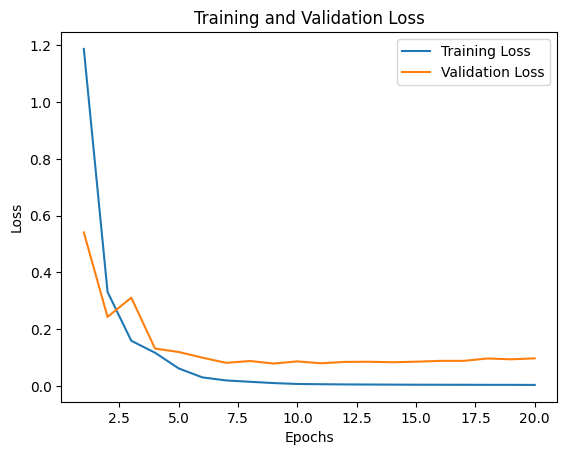

In [52]:
import matplotlib.pyplot as plt
epochs = range(1, 21)
 
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# plt.xticks(arange(0, 21, 2))
 
plt.legend(loc='best')
plt.show()

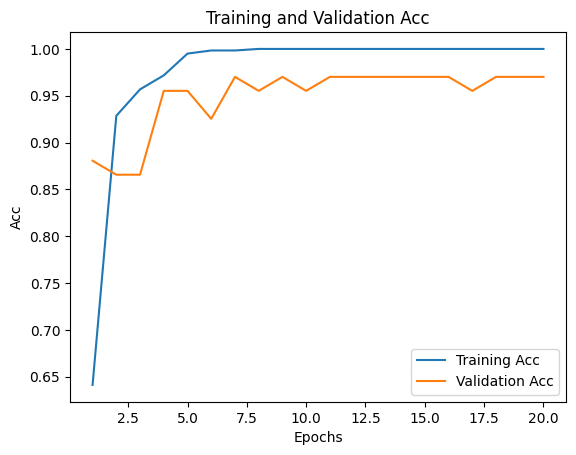

In [53]:
import matplotlib.pyplot as plt
epochs = range(1, 21)
 
plt.plot(epochs, train_acc, label='Training Acc')
plt.plot(epochs, val_acc, label='Validation Acc')

plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
 
# plt.xticks(arange(0, 21, 2))
 
plt.legend(loc='best')
plt.show()

In [54]:
# torch.save(classifier, 'final_model.pth')

In [ ]:
def clean_test_data(txt):
  text = txt
  text = re.sub(r'<[^>]*>', ' ', text) 
  text = re.sub(r'[^\x00-\x7F]+', ' ', text)
  words = text.split()
  for i in range(len(words)):
      words[i] = re.sub(r'[^\w]', ' ', words[i])
  text = ' '.join(words)
  text = ' '.join(text.split())
    
  stop_fact = StopWordRemoverFactory().get_stop_words()
  more_stopword = ['bapak', 'pak', 'ibu', 'bu', 'selamat', 'pagi', 'siang', 'sore', 
                   'Bapak', 'Pak', 'Ibu', 'Bu', 'Selamat', 'Pagi', 'Siang', 'Sore',
                   'assalamualaikum', 'assalamu', 'alaikum', 'wr', 'wb', 'ub', 'kepala', 'upt', 'universitas', 'brawijaya',
                   'mohon', 'maaf', 'yth', 'tik', 'sti', 'bantuannya', 'ac', 'id', 'co', 'com' 
                   'Assalamualaikum', 'Assalamu', 'Wr', 'Wb', 'UB', 'Ub', 'Kepala', 'UPT', 'Universitas', 'Brawijaya',
                   'Mohon', 'Maaf', 'Yth', 'TIK', 'STI']
    
  stopwords = stop_fact + more_stopword 
  dictionary = ArrayDictionary(stopwords)
  str = StopWordRemover(dictionary)

  text = str.remove(text)
  
  return text

# **Hyperparameter Tuning**

In [ ]:
pip install optuna

In [ ]:
def define_model(trial):
    hidden_size = trial.suggest_int('hidden_sz', 32, 128, step=32)
    model = Net(hidden_size)
    return model

def objective(trial):
    model = define_model(trial)
    
    batch_size = trial.suggest_int('batch_sz', 8, 40, step=8)
    num_workers = 2

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop'])
    lr = trial.suggest_loguniform('lr', 1e-4, 1e-1)
    wd = trial.suggest_loguniform('wd', 1e-4, 1e-1)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr, weight_decay=wd)
    criterion = nn.CrossEntropyLoss()
    
    for epoch in range(20):
        running_loss = 0.0
        correct = 0
        total = 0
        model.train()
        for data, target in train_loader:
            # Limiting training data for faster epochs.
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target.long())
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total
        
        valid_loss = 0.0
        correct = 0
        total = 0
        model.eval()
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs,labels.long())

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            valid_loss += loss.item()

        val_loss = valid_loss / len(val_loader)
        val_acc = correct / total
        
    return val_loss   
    

In [ ]:
import optuna

study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=100)

best_trial = study.best_trial

for key, value in best_trial.params.items():
    print("{}: {}".format(key, value))

In [ ]:
# Get the hyperparameter importance
importance = optuna.importance.get_param_importances(study)

# Print the hyperparameter importances
params = []
value = []
for param, importance_value in importance.items():
    params.append(param)
    value.append(importance_value)
    print(f"{param}: {importance_value}")

In [ ]:
plt.barh(params, value)

plt.xlabel('Importance')
plt.ylabel('Hyperparameter')
plt.title('Hyperparameter Importance')

plt.show()

In [ ]:
hidden_sz = best_trial.params['hidden_sz']
optim_name = best_trial.params['optimizer']
batch_sz = best_trial.params['batch_sz']
lr = best_trial.params['lr']
wd = best_trial.params['wd']

train_loader = DataLoader(train_dataset, batch_size=batch_sz, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_sz, shuffle=False)

classifier_tuned = Net(hidden_sz)
optimizer = getattr(optim, optim_name)(classifier_tuned.parameters(), lr=lr, weight_decay=wd)
criterion = nn.CrossEntropyLoss()

In [ ]:
num_epochs = 20
train_loss = []
train_acc = []
val_loss = []
val_acc = []
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = classifier_tuned(inputs)
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)

    print('Epoch [{}/{}], \n\tTrain Loss: {:.4f}, Train Acc: {:.4f}'
          .format(epoch+1, num_epochs, epoch_loss, epoch_acc))
    
    valid_loss = 0.0
    correct = 0
    total = 0
    model.eval()
    for inputs, labels in val_loader:
        outputs = classifier_tuned(inputs)
        loss = criterion(outputs,labels.long())
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        valid_loss += loss.item()
    
    val_loss.append(valid_loss / len(val_loader))
    val_acc.append(correct / total)

    print('\tVal Loss: {:.4f}, Val Acc: {:.4f}'
          .format(valid_loss / len(val_loader), correct / total))

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, 21)
 
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# plt.xticks(arange(0, 21, 2))
 
plt.legend(loc='best')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, 21)
 
plt.plot(epochs, train_acc, label='Training Acc')
plt.plot(epochs, val_acc, label='Validation Acc')

plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
 
# plt.xticks(arange(0, 21, 2))
 
plt.legend(loc='best')
plt.show()

In [ ]:
torch.save(classifier_tuned, 'final_model_tuned.pth')

In [ ]:
# Access the Optuna study results
study_results = study.trials_dataframe()
# study_results

# study_results.to_csv('study_results.csv', index=False)

# Extract hyperparameters and objective values
hyperparameters = study_results.drop(columns=['number', 'state', 'datetime_start', 'datetime_complete', 'duration'])
lenc = LabelEncoder()
hyperparameters['params_optimizer'] = lenc.fit_transform(hyperparameters['params_optimizer'])

In [ ]:
import plotly.express as px

# Create parallel coordinates plot using Plotly
fig = px.parallel_coordinates(hyperparameters, color='value')

# # Show the plot
fig.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

study_results = pd.read_csv('/kaggle/input/helpdesk-tik-raw/study_results.csv')
hyperparameters = study_results[['params_batch_sz', 'params_hidden_sz', 'params_lr', 'params_optimizer', 'params_wd', 'value']]
lenc = LabelEncoder()
hyperparameters['params_optimizer'] = lenc.fit_transform(hyperparameters['params_optimizer'])

correlation_matrix = hyperparameters.corr()

evaluation_metric_column = 'value'
correlation_with_evaluation_metric = correlation_matrix[evaluation_metric_column]
sorted_correlations = correlation_with_evaluation_metric.sort_values(ascending=False).drop(index=('value'))

sorted_correlations.plot.barh()

plt.xlabel('Correlation')
plt.ylabel('Hyperparameter')
plt.title('Hyperparameter Correlation')

plt.show()

In [ ]:
import plotly.express as px

# Create parallel coordinates plot using Plotly
fig = px.parallel_coordinates(hyperparameters[['params_wd', 'params_lr', 'value']], color='value', width=1200, height=600)

# # Show the plot
fig.show()

In [ ]:
hyperparameters[hyperparameters['value'] > 0.6].count()

In [ ]:
import plotly.express as px

# Create parallel coordinates plot using Plotly
fig = px.parallel_coordinates(hyperparameters[['params_wd', 'params_lr', 'value']][hyperparameters['value'] > 0.6], color='value', width=1200, height=600)
# # Show the plot
fig.show()

# **Manualisasi**

In [ ]:
pip install transformers

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel

In [ ]:
# contoh train data (109): "<p>Tolong bantu saya untuk pemulihan password agar bisa mengakses ke BAIS, SIAM dan Email</p>"
# contoh test data (1): "<p>bagaimana alur pengajuan web hosting untuk labolatorium fakultas?</p>"

man_1 = "Tolong bantu pemulihan password mengakses BAIS SIAM Email"
man_2 = "alur pengajuan web hosting labolatorium fakultas"

In [ ]:
pip install nlpaug

In [ ]:
import nlpaug.augmenter.word as naw

ins_aug = naw.ContextualWordEmbsAug(model_path='bert-base-multilingual-cased', action="insert")
aug_1 = ins_aug.augment(man_1)
aug_2 = ins_aug.augment(man_2)

print(aug_1)
print(aug_2)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
model = AutoModel.from_pretrained("bert-base-multilingual-cased", output_hidden_states=True)

In [ ]:
tok = tokenizer.tokenize(man_1)
tok_enc = tokenizer.encode(man_1,return_tensors="pt", max_length=65, padding="max_length", truncation=True)
print(tok)
print(tok_enc)

In [ ]:
output = model(tok_enc)
last_hidden_state = output.last_hidden_state
feature = last_hidden_state.mean(dim=1)

print(feature)

In [ ]:
# for x in feature:
#     for a in x:
#         print(a.item())

In [ ]:
tok_test = tokenizer.tokenize(man_2)
tok_test_enc = tokenizer.encode(man_2, return_tensors="pt", max_length=65, padding="max_length", truncation=True)
print(tok_test)
print(tok_test_enc)

In [ ]:
test_output = model(tok_test_enc)
test_hidden_state = test_output.last_hidden_state
test_feature = test_hidden_state.mean(dim=1)

print(test_feature)

In [ ]:
import math
class NaiveCustomLSTM(nn.Module):
    def __init__(self, input_sz: int, hidden_sz: int):
        super().__init__()
        self.input_size = input_sz
        self.hidden_size = hidden_sz
        
        #f_t forget gate
        self.W_f = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.U_f = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_f = nn.Parameter(torch.Tensor(hidden_sz))
        
        #i_t input gate
        self.W_i = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.U_i = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_i = nn.Parameter(torch.Tensor(hidden_sz))
        
        #g_t cell state updater
        self.W_g = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.U_g = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_g = nn.Parameter(torch.Tensor(hidden_sz))
        
        #o_t output gate
        self.W_o = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
        self.U_o = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
        self.b_o = nn.Parameter(torch.Tensor(hidden_sz))
        
        self.init_weights()
    
    def init_weights(self):
        limit = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            weight.data.uniform_(-limit, limit)
    
    def forward(self, x, init_states=None):
        bs, _ = x.size()
        
        if init_states is None:
            h_t, c_t = (
                torch.zeros(bs, self.hidden_size).to(x.device),
                torch.zeros(bs, self.hidden_size).to(x.device),
            )
        else:
            h_t, c_t = init_states
            
        x_t = x
        
#         for a in x_t:
#             for b in a:
#                 print(type(b.item()))
#                 break
        
        f_t = torch.sigmoid(x_t @ self.W_f + h_t @ self.U_f + self.b_f)
        print("f_t = ", f_t)
        i_t = torch.sigmoid(x_t @ self.W_i + h_t @ self.U_i + self.b_i)
        print("i_t = ", i_t)
        g_t = torch.tanh(x_t @ self.W_g + h_t @ self.U_g + self.b_g)
        print("g_t = ", g_t)
        o_t = torch.sigmoid(x_t @ self.W_o + h_t @ self.U_o + self.b_o)
        print("o_t = ", o_t)
        c_t = f_t * c_t + i_t * g_t
        print("c_t = ", c_t)
        h_t = o_t * torch.tanh(c_t)
        print("h_t = ", h_t)
        
        return h_t, (h_t, c_t)

In [ ]:
lstm = NaiveCustomLSTM(768, 32)

In [ ]:
W_f = pd.read_csv('/kaggle/input/helpdesk-tik-raw/W_f.csv', header=None)
U_f = pd.read_csv('/kaggle/input/helpdesk-tik-raw/U_f.csv', header=None)
b_f = pd.read_csv('/kaggle/input/helpdesk-tik-raw/b_f.csv', header=None).dropna(axis=1)
W_i = pd.read_csv('/kaggle/input/helpdesk-tik-raw/W_i.csv', header=None)
U_i = pd.read_csv('/kaggle/input/helpdesk-tik-raw/U_i.csv', header=None)
b_i = pd.read_csv('/kaggle/input/helpdesk-tik-raw/b_i.csv', header=None).dropna(axis=1)
W_g = pd.read_csv('/kaggle/input/helpdesk-tik-raw/W_g.csv', header=None)
U_g = pd.read_csv('/kaggle/input/helpdesk-tik-raw/U_g.csv', header=None)
b_g = pd.read_csv('/kaggle/input/helpdesk-tik-raw/b_g.csv', header=None).dropna(axis=1)
W_o = pd.read_csv('/kaggle/input/helpdesk-tik-raw/W_o.csv', header=None)
U_o = pd.read_csv('/kaggle/input/helpdesk-tik-raw/U_o.csv', header=None)
b_o = pd.read_csv('/kaggle/input/helpdesk-tik-raw/b_o.csv', header=None).dropna(axis=1)

In [ ]:
lstm.W_f = nn.Parameter(torch.tensor(W_f.values).float())
lstm.U_f = nn.Parameter(torch.tensor(U_f.values).float())
lstm.b_f = nn.Parameter(torch.tensor(b_f.values).float().squeeze())
lstm.W_i = nn.Parameter(torch.tensor(W_i.values).float())
lstm.U_i = nn.Parameter(torch.tensor(U_i.values).float())
lstm.b_i = nn.Parameter(torch.tensor(b_i.values).float().squeeze())
lstm.W_g = nn.Parameter(torch.tensor(W_g.values).float())
lstm.U_g = nn.Parameter(torch.tensor(U_g.values).float())
lstm.b_g = nn.Parameter(torch.tensor(b_g.values).float().squeeze())
lstm.W_o = nn.Parameter(torch.tensor(W_o.values).float())
lstm.U_o = nn.Parameter(torch.tensor(U_o.values).float())
lstm.b_o = nn.Parameter(torch.tensor(b_o.values).float().squeeze())

In [ ]:
for name, param in lstm.named_parameters():
    print(param.size())

In [ ]:
fc1 = nn.Linear(32, 7)

In [ ]:
fc1.weight = nn.Parameter(torch.Tensor(pd.read_csv('/kaggle/input/helpdesk-tik-raw/W_fc1 (1).csv', header=None).values).float())
fc1.bias = nn.Parameter(torch.Tensor(pd.read_csv('/kaggle/input/helpdesk-tik-raw/b_fc1 (1).csv', header=None).values).float().squeeze())

In [ ]:
for name, param in fc1.named_parameters():
    print(param.size())

In [ ]:
class LSTMNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = lstm
        self.fc1 = fc1
        
    def forward(self, x):
        x_, (h_n, c_n) = self.lstm(x)
        x_ = self.fc1(x_)
        print(x_)
        return x_

In [ ]:
lstm_classifier = LSTMNet()
# lstm_classifier = 
lstm_optimizer = optim.Adam(lstm_classifier.parameters(), lr=0.1)
lstm_criterion = nn.CrossEntropyLoss()

In [ ]:
lstm_optimizer.zero_grad()
lstm_output = lstm_classifier(feature)
print(lstm_output)
lstm_loss = lstm_criterion(lstm_output, torch.Tensor([1]).long())
print(lstm_loss)
lstm_loss.backward(retain_graph=True)
lstm_optimizer.step()

In [ ]:
torch.save(lstm_classifier, 'lstm_classifier.pt')

In [ ]:
for name, param in lstm_classifier.named_parameters():
    print(param.grad)

In [ ]:
lstm_class_param = ['W_f', 'U_f', 'b_f', 'W_i', 'U_i', 'b_i', 'W_g', 'U_g', 'b_g', 'W_o', 'U_o', 'b_o', 'W_fc1', 'b_fc1']

In [ ]:
for name, param in lstm_classifier.named_parameters():
    print(param)

In [ ]:
i = 0
for param in lstm_classifier.parameters():
  with open(lstm_class_param[i] + '_grad.csv', 'w') as f:
    for par in param.grad:
      if par.size():
        f.write(",".join(str(item) for item in par.tolist()) + '\n')
      else:
        f.write(str(par.data.tolist()) + ',')
  i +=1

In [ ]:
i = 0
for param in lstm_classifier.parameters():
  with open(lstm_class_param[i] + '_update.csv', 'w') as f:
    for par in param:
      if par.size():
        f.write(",".join(str(item) for item in par.tolist()) + '\n')
      else:
        f.write(str(par.data.tolist()) + ',')
  i +=1